<h1><center>Simple Linear Regression</center></h1>

<h4>What is Regression?</h4>
In simple terms, regression is the process of predicting a continuous value.
For example: Predicting a sales persons total yearly sales from age, education, years of experience, etc.

There are two types of variables in regression: One Dependent variable (denoted as Y) & one or many independent variable/s (denoted as X). Dependent variable(Y) can also be termed as 'target variable' and independent variable(X) can be termed as the 'explanatory variable. Key point to be noted here is: <b><i>Dependent variable (Y) should be a continuous variable and cannot be a discrete value</i></b>.

<h4>What is Simple Linear Regression?</h4>
Simple regression is when one independent variable(X) is used to estimate a dependent variable(Y). Simple regression can be Linear or Non-Linear.
    Equation: Y(hat) = a + bX where, Y(hat) is the response variable or the predicted value, X is the predictor or the independent variable, b is the slope and a is the constant. a, b are also called as the co-effcients of the linear equation.

<h4>How do you find the linearity of regression?</h4>
Linearity of regression is based on the nature of relationship between independent and dependent variables.
    
<h4>What is residual error?</h4>
The difference between the actual to the predicted values, can be written as Y - Y(hat) where Y is the actual value and Y(hat) is the predicted value. Or, it can also be said that the residual error is the distance from the data point to the fitted regression line. 
    
The objective of linear regression is to minimize the MSE (mean squared error) and to do this we should find the best parameters a, b in the equation Y(hat) = a +bX.
    
MSE - Mean Squared Error, lower the MSE we get the best fit line.

<h2>Problem Statement</h2>

Can we predict CO2 Emmission with the Engine Size?

<h4>Importing required packages</h4>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

<h4>Downloading & Reading Data</h4>
Dataset has been downloaded from 'Government of Canada' website to JupyterLabs. 

__Reading the dataset__:

In [2]:
df = pd.read_csv('training/fuel_consumption.csv')

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244



<h4>Understanding the Data</h4>

`fuel_consumption.csv`:
The dataset used here is pulled up from Canada Government website. The dataset contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. 

<b>Datasource:</b>
<br>http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64</br>

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   

<h4>Data Exploration</h4>
Descriptive statistics is used to explore the data better.

In [3]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1072.0,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,2014.0,3.340578,5.786381,13.276026,9.464366,11.565112,26.486007,255.913246
std,0.0,1.415152,1.797415,4.104639,2.793379,3.486813,7.496391,63.442769
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.200000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.500000,10.725000,13.300000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


<br><b>Features Selection</b>:</br>

In [4]:
cdf = df[['ENGINESIZE','CO2EMISSIONS']]
cdf.head(10)


,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
5,3.5,230
6,3.5,232
7,3.7,255
8,3.7,267
9,2.4,212


Histogram plot for each of these features:

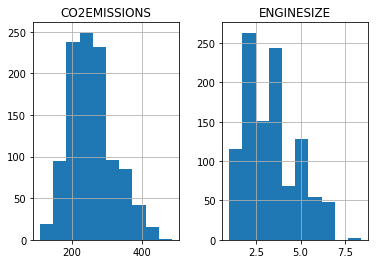

In [5]:
cdf.hist()
plt.show()

A scatter plot for Engine Size vs the Emission, to see how linear is their relation:

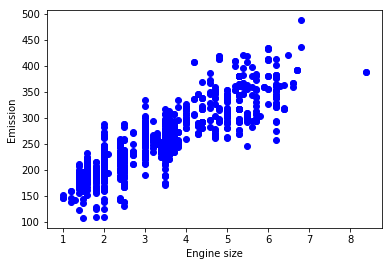

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<h4>Training and Test Dataset</h4>
There are two ways to approach this method. First method is to train the entire dataset and then select a small portion of the dataset to test the model. This approach will have high training accuracy and low out of sample accuracy (because the model knows all of the testing data points from the training set. 

<b>Training Accuracy?</b> - It is the percentage of correct predictions that the model makes when using the test dataset. High training accuracy results in an over-fit of the data.

<b>Out of sample accuracy?</b> - It is the percentage of correct predictions that the model makes on data that the model is not been trained on. It is important for the models to have high out of sample accuracy because the purpose of the model is to make correct predictions of the unknown data.

So, in order to obtain high out of sample accuracy our first approach will not help. Hence, we need to look at another approach that is:

<b>Train/Test Split:</b>
In this approach we select a portion of our data for training and the rest dataset is used for testing the model. The model is built on the training set and then the test feature set is passed to the model for prediction and finally, the predicted values of the test set are compared with the actual values of the testing set.

Let's split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. I have created a mask to select random rows using np.random.rand() function: 

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h4>Train data distribution</h4>


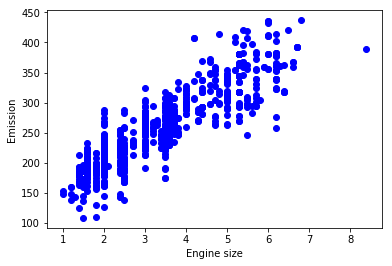

In [8]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<h4>Modelling</h4>

Using sklearn package to model data.

In [9]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.56946969]]
Intercept:  [123.94359147]


As mentioned before, coefficient and intercept in simple linear regression are the parameters of the fit line. 
Given that, it is a simple linear regression with only two parameters and knowing that the parameters are the intercept and slope of the line, sklearn can automatically estimate them directly from the data. 


<h4>Plotting Output</h4>

plotting fit line over the datapoints

Text(0, 0.5, 'Emission')

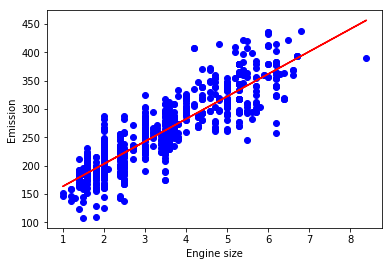

In [10]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

<h4>Evaluation</h4>

Let us now evaluate the above model. To do this, we compare the actual values and predicted values to calculate the accuracy of the above simple regression model. 

There are different model evaluation metrics, here I have used R(square) to calculate the accuracy of the model based on the test set: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. To understand it is just an average error.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> R-squared is not error, but is a popular metric for evaluate the accuracy of a model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits the data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>

In [13]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 26.24
Residual sum of squares (MSE): 1232.41
R2-score: 0.60


The result R2-Score: 0.60 denotes that the above model shows a decent prediction but not great. As a rule of thumb R2-value should be greater than 0.60.

<h4>Conclusion</h4>

By substituting the values in our equation. y = intercept + coefficient*(X) we get, 
y = 123.5 + 39.4*(X)

For every 1 unit increase in 'enigine size'(X) there will be 163 units of Co2 emmision.